In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

**MSE GD - DC NOISE**

The estimated DC value is 5.001322715142792


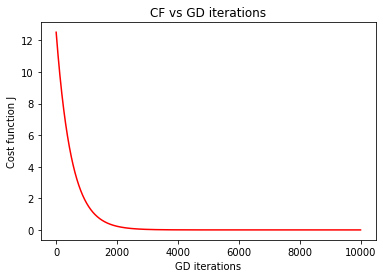

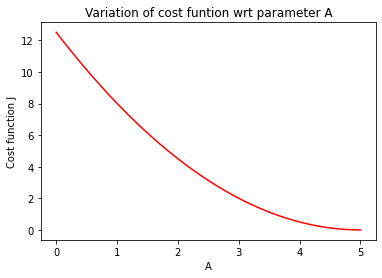

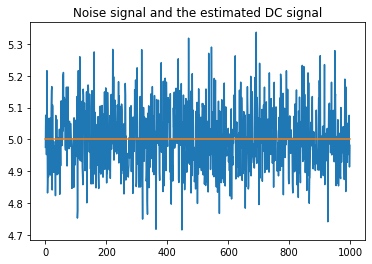

In [ ]:
A = 0
alpha = 0.001

data = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/DC_noise1.xlsx')
col1 = data["y"].to_numpy()
col0 = data["n"].to_numpy()

m = col0.size

J_A = []
A_list = []

for j in range(10000):
  sum = 0
  c = 0
  sum_J = 0
  for i in range(m):
    sum = sum + (A - col1[i])
    sum_J = sum_J + (A - col1[i])**2
    c = c + 1
  dJ_dA = sum / c
  J = 1/(2*m) * sum_J
  A_list.append(A)
  A = A - alpha * dJ_dA
  J_A.append(J)

print(f'The estimated DC value is {A}')
plt.plot(list(range(10000)), J_A, '-r')
plt.title("CF vs GD iterations")
plt.xlabel("GD iterations")
plt.ylabel("Cost function J")
plt.show()
plt.plot(A_list, J_A, '-r')
plt.title("Variation of cost funtion wrt parameter A")
plt.xlabel("A")
plt.ylabel("Cost function J")
plt.show()
plt.plot(col0,col1)
plt.plot(col0,np.repeat(A,col0.size))
plt.title("Noise signal and the estimated DC signal")
plt.show()



**MAE GD - DC NOISE WITH OUTLIERS**

The estimated DC value is 4.99673999999995


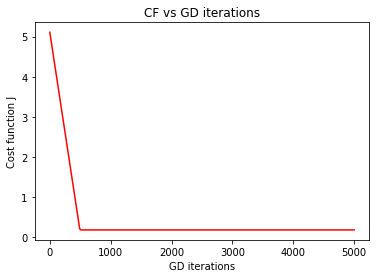

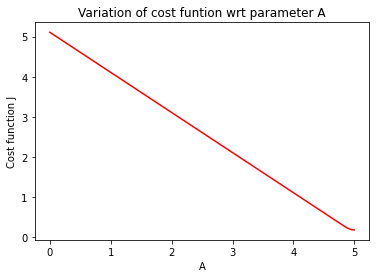

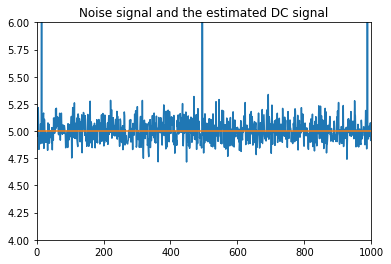

In [ ]:
data = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/DC_noise2.xlsx')
col1 = data["y"].to_numpy()
col0 = data["n"].to_numpy()

m = col0.size
A = 0
alpha = 0.01

J_A = []
A_list = []

for j in range(5000):
  sum = 0
  c = 0
  sum_J = 0
  for i in range(m):
    if(A > col1[i]):
       sum = sum + 1
    elif(A == col1[i]):
      sum = sum
    else:
      sum = sum - 1
    sum_J = sum_J + abs(A - col1[i])
    c = c + 1
  dJ_dA = sum/c
  J = sum_J/m
  A_list.append(A)
  A = A - alpha * dJ_dA
  J_A.append(J)


print(f'The estimated DC value is {A}')

plt.plot(list(range(5000)), J_A, '-r')
plt.title("CF vs GD iterations")
plt.xlabel("GD iterations")
plt.ylabel("Cost function J")
plt.show()
plt.plot(A_list, J_A, '-r')
plt.title("Variation of cost funtion wrt parameter A")
plt.xlabel("A")
plt.ylabel("Cost function J")
plt.show()

plt.plot(col0,col1)
plt.plot(col0,np.repeat(A,col0.size))
plt.xlim(0, 1000)
plt.ylim(4,6)
plt.title("Noise signal and the estimated DC signal")
plt.show()


**MSE SIN WAVE GD** 

The amplitude value is 5.034292850927011
The phi value in degree is 15.970859398614428


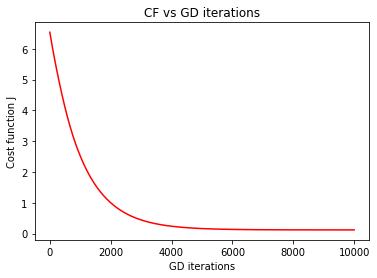

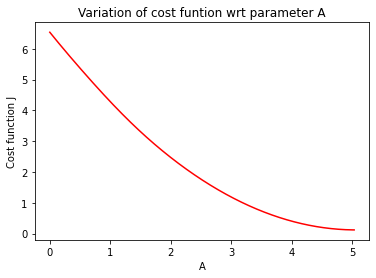

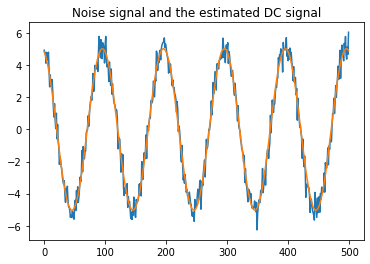

In [ ]:
d = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/sinusoid_noise.xlsx')
data = d.to_numpy()

col0 = d['Unnamed: 0'].to_numpy()
col1 = d["y"].to_numpy()

m = col0.size

f0 = 10

A = 0
phi = 0
alpha = 0.001
J = []
A_1 = []
phi_1 = []


for i in range(10000):
  cf_sum = 0
  ja_i = 0
  jphi_i = 0
  c = 0
  for i in range(m):
    faphi = A * np.cos((2 * np.pi * (i/100)) + phi)
    cf_sum = cf_sum + (faphi - col1[i]) **2
    ja_i = ja_i +( (faphi - col1[i]) * np.cos((2 * np.pi * (i/100)) + phi) )
    jphi_i = jphi_i + ((faphi - col1[i]) * np.sin((2 * np.pi * (i/100)) + phi) * A)
  dJ_dA = ja_i/ m
  dJ_dPhi = jphi_i/(-m)
  cf = cf_sum/(2*m)
  J.append(cf)
  A_1.append(A)
  phi_1.append(phi)
  A = A - alpha * dJ_dA
  phi = phi - alpha * dJ_dPhi 


c = np.arange(0,col1.size,1)
signal = A * np.cos(2 * np.pi * c/100 + phi)

print(f'The amplitude value is {A}')
print(f'The phi value in degree is {phi * 180 / np.pi}')

plt.plot(list(range(10000)), J, '-r')
plt.title("CF vs GD iterations")
plt.xlabel("GD iterations")
plt.ylabel("Cost function J")
plt.show()
plt.plot(A_1, J, '-r')
plt.title("Variation of cost funtion wrt parameter A")
plt.xlabel("A")
plt.ylabel("Cost function J")
plt.show()
plt.plot(col0,col1)
plt.plot(col0, signal)
plt.title("Noise signal and the estimated DC signal")
plt.show()


**RAMP SIGNAL GD - MSE**

The estimated value of the slope 'a' is 2.9950878977479487
The estimated value of the intercept 'c' is -36.9542852379347


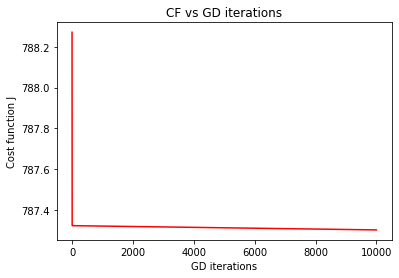

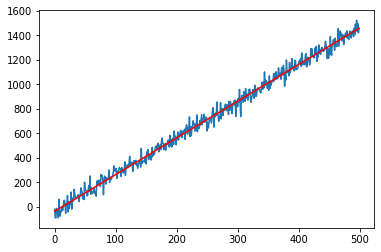

In [18]:
data = pd.read_excel('/content/gdrive/MyDrive/Lab1_partA/ramp_noise.xlsx')
column_2 = data["y"].to_numpy() * 1.0
column_1 = data["x"].to_numpy()  * 1.0
column_0 = data["Unnamed: 0"].to_numpy()
m = column_0.size

w = 3
b = -37
alpha = 0.00001
J = []
w_list = []
b_list = []
for j in range(10000):
  cf = 0.0
  dJ_dw_i = 0.0
  dJ_db_i = 0.0
  for i in range(m):
    #f_wb = w * column_1[i] + b
    #e = f_wb - column_2[i]
    cf = cf + (w * column_1[i] + b - column_2[i])**2
    dJ_dw_i = dJ_dw_i + ((w * column_1[i] + b) - column_2[i]) * column_1[i]
    dJ_db_i = dJ_db_i + ((w * column_1[i] + b) - column_2[i])
  dj_dw = dJ_dw_i/m
  dj_db = dJ_db_i/m
  costf = cf/(2*m)
  w = w - alpha * dj_dw
  b = b - alpha * dj_db
  J.append(costf)
  w_list.append(w)
  b_list.append(b)

print(f"The estimated value of the slope 'a' is {w}")
print(f"The estimated value of the intercept 'c' is {b}")


plt.plot(list(range(10000)), J, '-r')
plt.title("CF vs GD iterations")
plt.xlabel("GD iterations")
plt.ylabel("Cost function J")
plt.show()

y = []
for i in range(m):
  y.append(w*column_1[i] + b)
plt.plot(column_1,column_2)
plt.plot(list(range(m)),y, '-r')
plt.show()